### Loading libararies

In [38]:
# loading R packages

library(tidyverse)
library(forcats)
library(ggplot2)
library(tidyr)
library(tidymodels)
library(pROC)
library(GGally)
library(dplyr)


### Import Dataset

The dataset used is available here: https://www.kaggle.com/mlg-ulb/creditcardfraud

Let's have a look at the data

In [5]:
credit_card <- read_csv("/Users/yoonhakim/Desktop/UBC/Project/CreditCard_Fraud_Detection/Data/creditcard.csv")
head(credit_card)


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.




Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [6]:
colnames(credit_card)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

### Explanatory Data Analysis

The data is already scaled by PCA transformation, we don't need any scaling and cleaning.

In [7]:
credit_split <- initial_split(credit_card, prop = 0.75, strata = Class)
credit_train <- training(credit_split)
credit_test <- testing(credit_split)

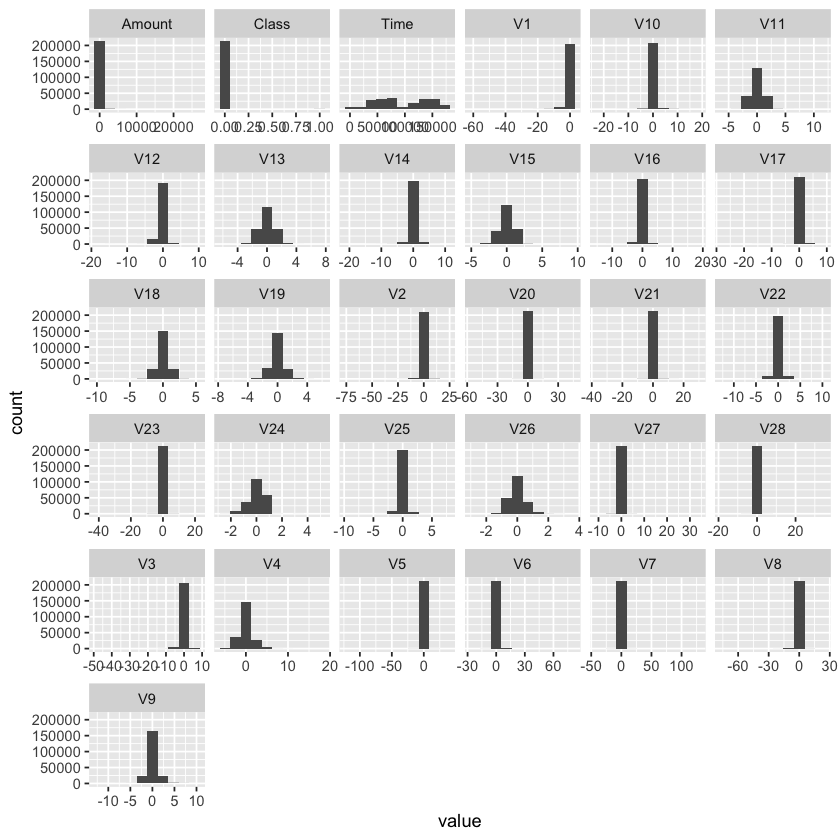

In [8]:

ggplot(gather(credit_train), aes(value)) + 
    geom_histogram(bins = 10) + 
    facet_wrap(~key, scales = 'free_x')


Look at the histogram above, the most of V's are centered around 0 with some or no outliers. It can be seen as there were very few fraudulent cases over valid cases in the class histogram.

In [9]:
# determine the number of fraud cases
fraud <- filter(credit_train, Class == 1)
valid <- filter(credit_train, Class == 0)
nrow(fraud)
nrow(valid)

[1] 348

[1] 213258

### Fitting Logistic Regression

Logistic Regression Model is used to predict the credit card fraud/not fraud.

In [10]:
Logistic_model = glm(Class~.,credit_train, family = binomial())
summary(Logistic_model)


Call:
glm(formula = Class ~ ., family = binomial(), data = credit_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.7309  -0.0272  -0.0182  -0.0113   4.5551  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.756e+00  3.130e-01 -27.969  < 2e-16 ***
Time        -1.597e-06  2.669e-06  -0.598 0.549561    
V1           4.899e-02  5.090e-02   0.962 0.335851    
V2           1.051e-01  7.799e-02   1.348 0.177794    
V3          -5.257e-03  6.347e-02  -0.083 0.933981    
V4           6.985e-01  1.012e-01   6.900 5.21e-12 ***
V5           1.844e-01  8.405e-02   2.194 0.028225 *  
V6          -1.210e-01  8.713e-02  -1.389 0.164935    
V7          -7.077e-02  8.478e-02  -0.835 0.403847    
V8          -1.744e-01  3.588e-02  -4.861 1.17e-06 ***
V9          -9.681e-02  1.429e-01  -0.678 0.498010    
V10         -7.678e-01  1.212e-01  -6.337 2.34e-10 ***
V11         -6.625e-02  9.626e-02  -0.688 0.491266    
V12          1.824e-01  1.1

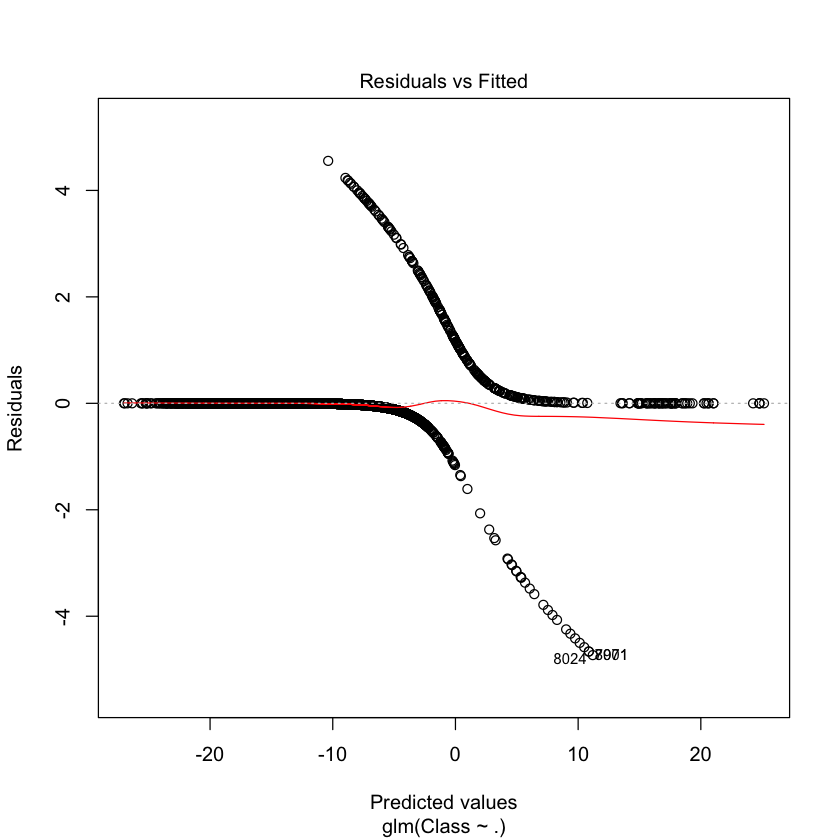

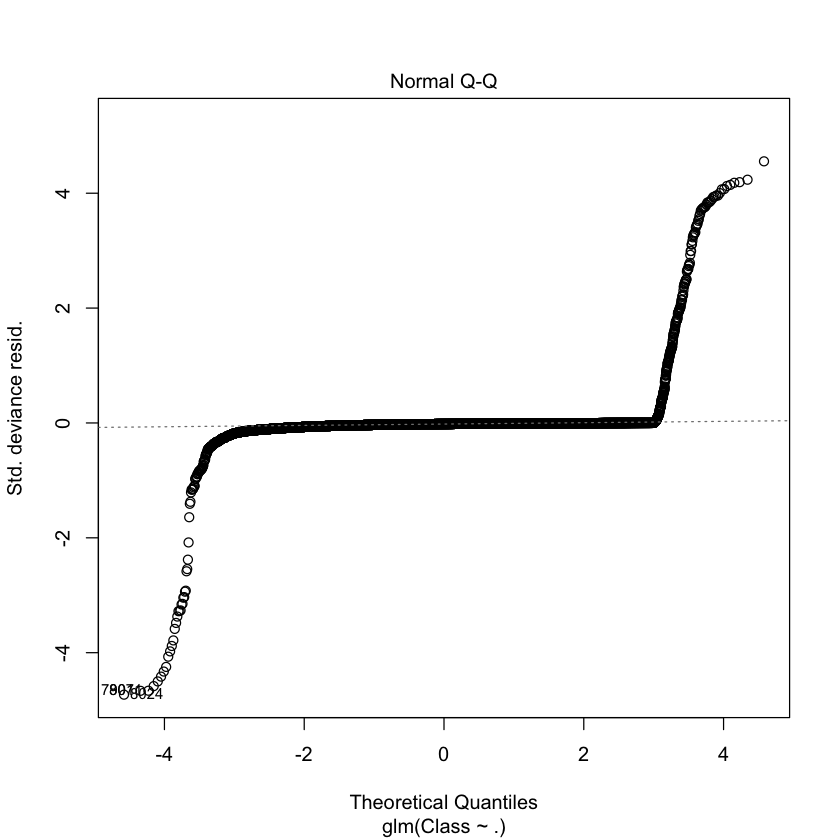

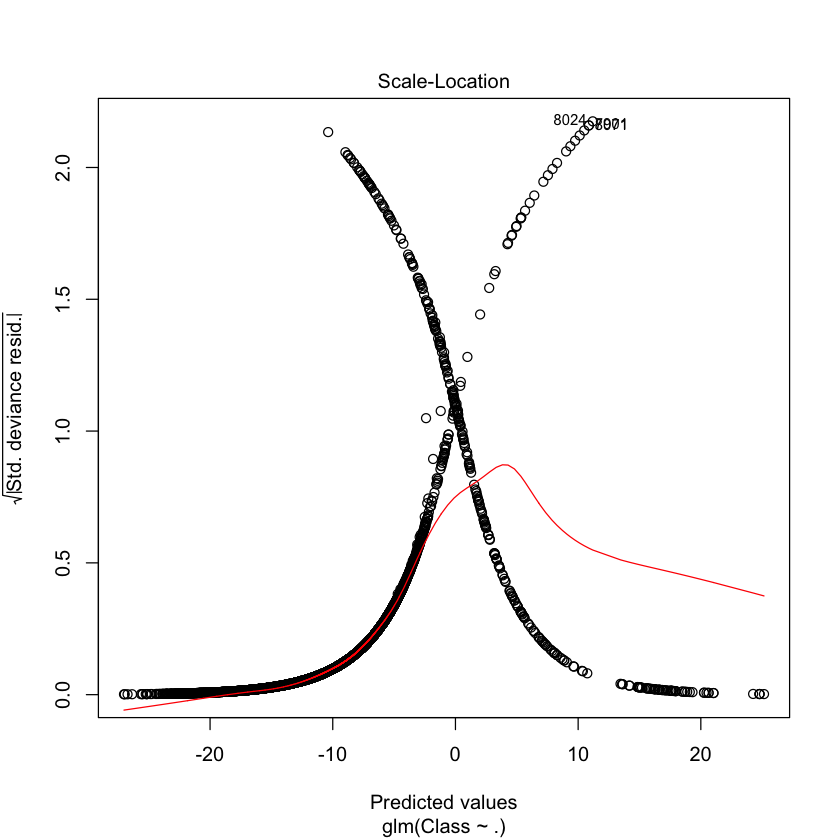

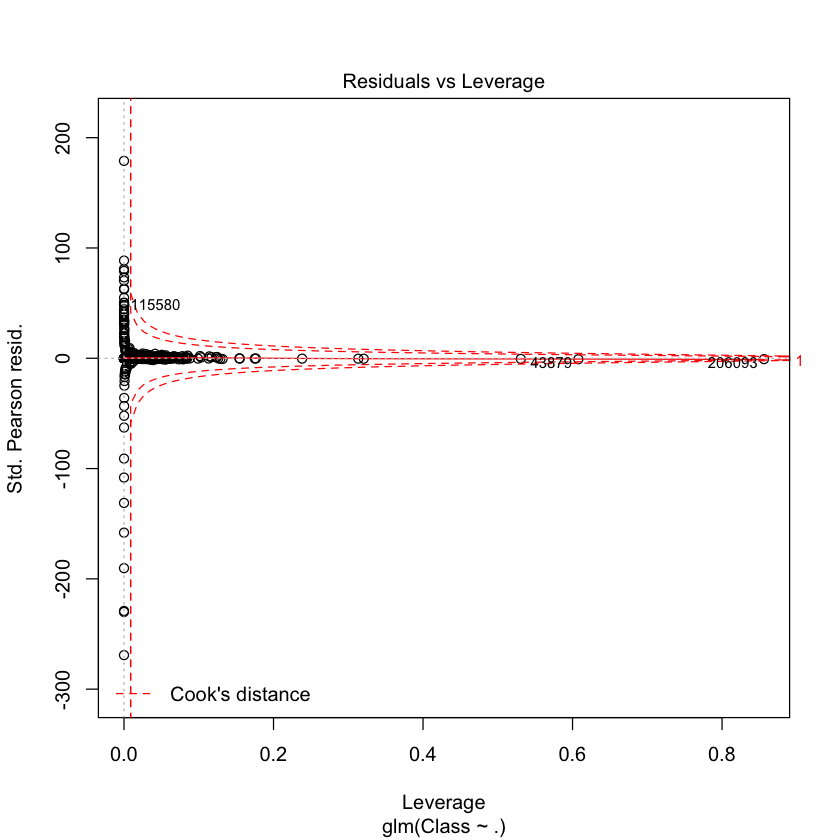

In [11]:
plot(Logistic_model)



### Performance of Logistic Regression

To asses the preformance of Logistic Regression, ROC curve is made. ROC is known as receiver operating characteristics.

Setting levels: control = 0, case = 1

Setting direction: controls < cases



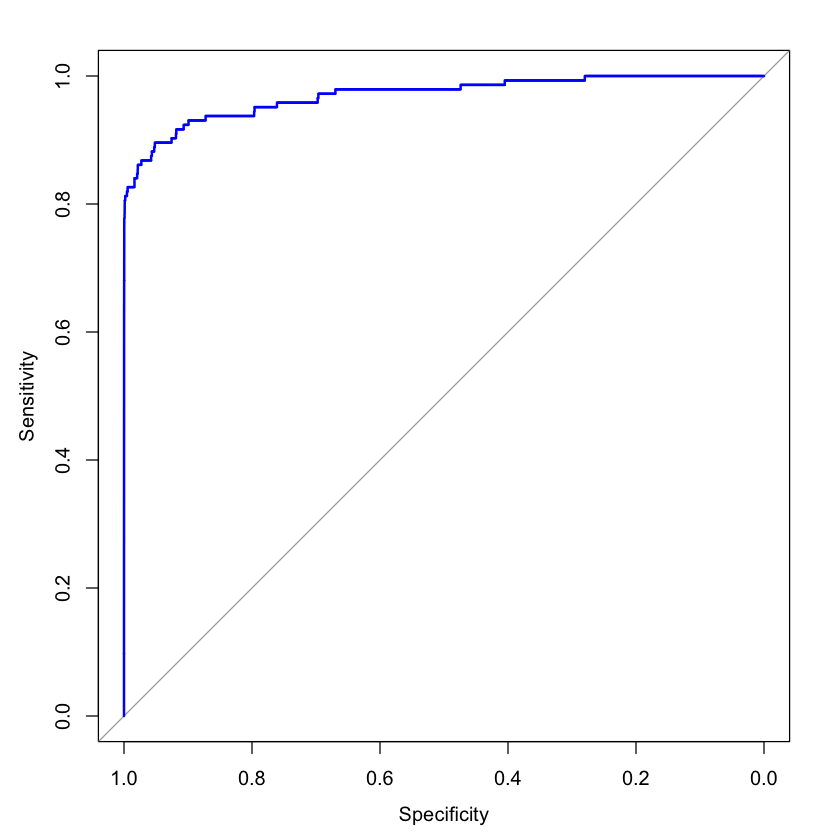

In [34]:
logistic_predict <- predict(Logistic_model,credit_test, probability = TRUE)
auc.logit = roc(credit_test$Class, logistic_predict, plot = TRUE, col = "blue")

An ideal ROC curve will hug the top left corner, so the larger the AUC the better the classifier. The above ROC curve represents that the performance of logistic regression is great. Since the area under the blue curve is really large which is considered very good.

### Gradient Boosting

In [52]:
library(gbm)
#grad_boost = gbm(Class~., data = credit_train, n.trees = 500,  distribution = "bernoulli")
#Estimates the optimal number of boosting iterations for a gbm object
#gbm.iter = gbm.perf(grad_boost, method = "test")

In [55]:
model_gbm <- gbm(Class ~ .
               , distribution = "bernoulli"
               , data = rbind(credit_train, credit_test)
               , n.trees = 500
               , interaction.depth = 3
               , n.minobsinnode = 100
               , shrinkage = 0.01
               , bag.fraction = 0.5
               , train.fraction = nrow(credit_train) / (nrow(credit_train) + nrow(credit_test)))